# The Iris Dataset

The iris dataset is a famous dataset taken from Fisher's paper. Iris is a flowering plant and the common name given to all iris species. 

Fisher's dataset contains data about 3 classes/species of iris plant (iris-setosa, iris-versicolor and iris-virginica). 150 plants were sampled, 50 for each species of iris. Four features (individual x variables) were measured: sepal length, sepal width, petal length and petal width, all in cm. The class of iris plant was the target (y variable) which had been assigned by an expert botanist. Thus, this is an example of supervised learning. 

Importing in an image that shows the different species of iris.

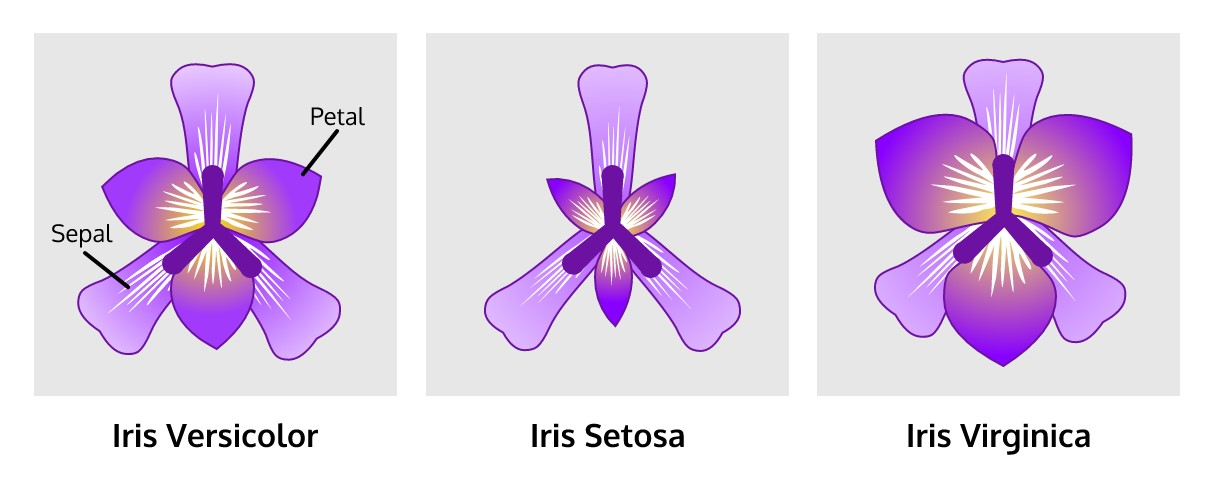

In [4]:
from IPython import display
display.Image(r"C:\Users\as17215\Python\indiv_project\iris_picture.jpg")

Aim: The aim of this code is to produce a model using the iris dataset, to determine the species of iris based on these certain features.

**Importing the data**

Scikit-learn contains a few datasets (including iris). Therefore, scikit-learn can be loaded and the iris dataset imported from this, rather than having to download it from an external website. 

Defining and splitting the data into X and y: 

- X (capital) is given for all the features (sepal length, width and petal length, width) 

- y is given for the target (iris class - setosa, verscolor and virginica)

In [78]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

**Examining the data**

First looking at the targets:

In [79]:
y = y.replace(dict(enumerate(load_iris().target_names)))

This funciton above converts the numerical target values (0, 1, 2) to strings, the species name (setosa, versicolor, virignica), respecitvely, for the y column.

In [80]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

Looking at the features:

In [81]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


This table shows the 4 features and the data for the first 5 samples of iris.

**Plotting the correlation between features**

To get the linear correlation between all the features, the corr() method is called on the features (X) and assigned to the variable corr. The table sets out the features along the rows and columns, giving the correlation between each pair. 1.0 is given as the absolute positive correlation and thus, shows for the correlation between the same feature. 

In [82]:
corr = X.corr()

In [83]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


It is useful to see the correlation visually. Thus, a heatmap and pairplot can be plotted.

Plotting a heatmap:

The visualisation library Seaborn, is imported and the heatmap method applied to the correlation data.

<AxesSubplot:>

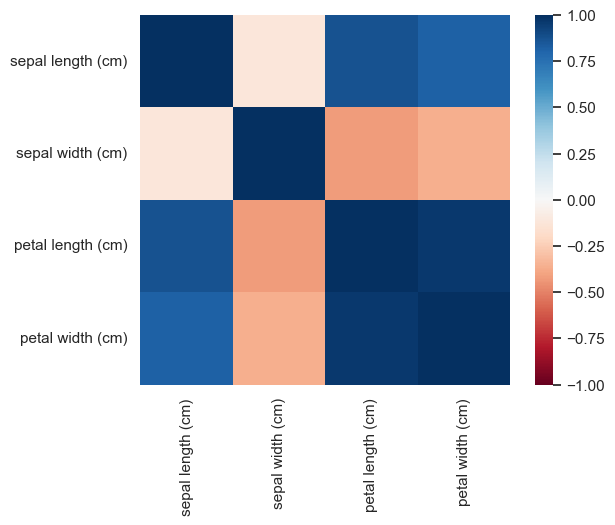

In [84]:
%matplotlib inline

import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

The heatmap is an example of multiple cross-correlation and plots every feature against each other, colouring in the cell based on the correlation between the features. A first glance shows sepal width and sepal length are the most uncorrelated pair. In comparison, petal width and petal length are the most positively correlated. Petal length and sepal width are the most negatively correlated pair.

Plotting a pairplot:

pandas is imported and the theme is set.

In [85]:
import pandas as pd

In [86]:
sns.set_theme(style="darkgrid", palette="husl") 

For the purpose of plotting a pairplot and scatter plot the X and y data needs to be grouped:

In [87]:
X_y = pd.concat([X,y], axis=1)

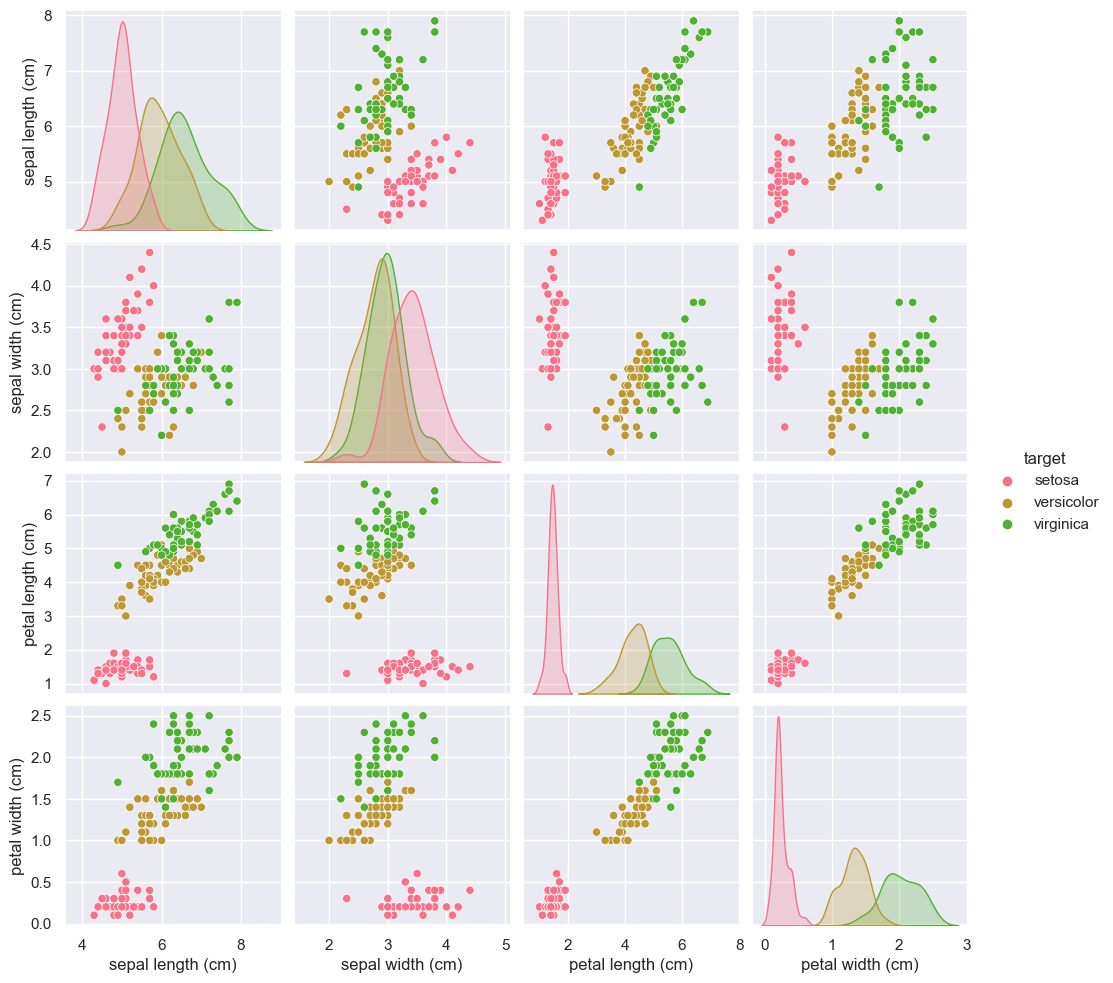

In [88]:
sns.pairplot(data=X_y, hue="target")

The pairplot plots each feature against every other and each cell intersection shows a scatter plot to indicate the relationship between the two features. The plots are also coloured by species of iris. It confirms that sepal width and sepal length are the most uncorrelated features as the datapoints are more scattered forming a blob rather than a strong diagonal line. Therefore, it seems that the two best features to use to make a model which can predict the species of iris is sepal width and sepal length, since both features are providing predictive power.

Looking at the indivdual scatter plot for sepal length against sepal width.

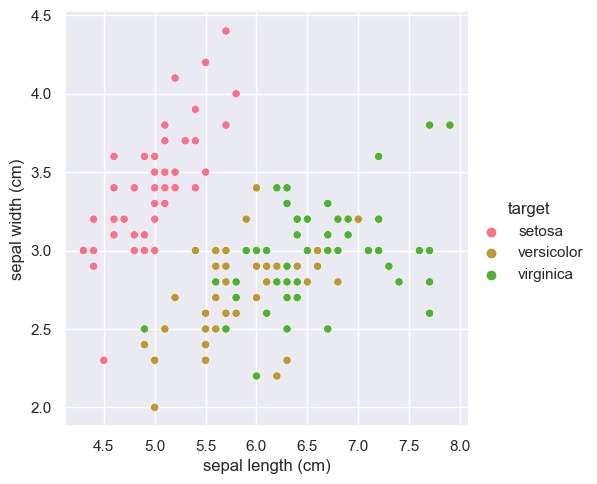

In [89]:
sns.relplot(data=X_y, x="sepal length (cm)", y="sepal width (cm)", hue="target")

This scatter plot is the same as in the pairplot but blown up. It shows clearly that the two features are fairly uncorrelated. The species look fairly distinct from each other with setosa being well separated from versicolor and virginica. 

**Making a predictive model**

**k-nearest neighbours (kNN)**

To make a model which can predict the species of iris based on sepal length and sepal width, k nearest neighbours can be used. This will work well as based on sepal length and width, the species are relatively uncorrelated and distinguishable from each other.

kNN works by assigning the species of iris to your data, based on the most common species of its nearest neighbours.

First the dataframe is defined and the two desired features selected. In this case they are sepal length and sepal width. Here XS is used to represent X-Subset.

The data is then split into a train and test subset. Here the random split is assigned as 42 so that the random split is reproducible each time.

In [90]:
from pandas import DataFrame
from sklearn.model_selection import train_test_split

X = DataFrame(load_iris().data, columns=load_iris().feature_names)
XS = X[["sepal length (cm)", "sepal width (cm)"]]
y = load_iris().target

train_XS, test_XS, train_yS, test_yS = train_test_split(XS, y, random_state=42)

The model can now be used and to do this, the model KNeighboursClassifier needs to be imported. For now, the number of neighbours is set to the default, 5.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_XS, train_yS)

KNeighborsClassifier()

The performance of the model can be checked against the test data, producing a score which assesses how good the model is.

In [92]:
model.score(test_XS, test_yS)

0.8157894736842105

This score suggests the model is pretty good but there is still room for improvement.

The hyperparameter (number of neighbours) can be adjusted to give the ideal number of nearest neighbours which produce the best possible score. This can be done using GridSearchCV which will automatically run every possible hyperparameter it is given, so the best one can be chosen.

In this case, it will run every value of neighbours from 1 to 60, using the training data to choose the best one.

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 60),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_XS, train_yS)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 60)})

This sorts the analysis by the test score:

In [94]:
cv_results = DataFrame(model.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
17,18,0.795652,0.049044,1
30,31,0.795652,0.056227,1
28,29,0.795257,0.042471,3
39,40,0.795257,0.089407,3
41,42,0.795257,0.070491,3


This table implies that 18 and 31 neighbours are the best ranked that give rise to the best score.

A scatter plot can also be plotted to show this visually:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

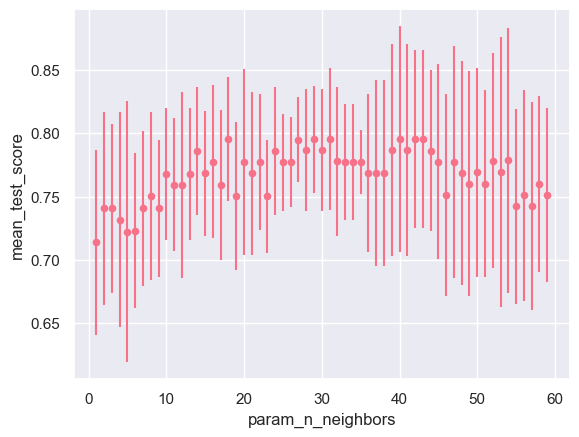

In [95]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

From both the table and plot, 18 or 31 seems like the best number of nearest neighbours to use. The model can now be fitted with with both 18 and 31 nearest neighbours to see which is the best number to use. 

First with 18 nearest neighbours:

In [96]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=18)
model.fit(train_XS, train_yS)

KNeighborsClassifier(n_neighbors=18)

In [97]:
model.score(test_XS, test_yS)

0.7894736842105263

This gives a lower score compared to when run with the default, 5 nearest neighours.

Now fitting with 31 nearest neighbours:

In [98]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=31)
model.fit(train_XS, train_yS)

KNeighborsClassifier(n_neighbors=31)

In [99]:
model.score(test_XS, test_yS)

0.8947368421052632

This shows that using 31 nearest neighbours gives a better model than with 18 and 5. It improves the model, increasing the score to 0.895 (3 d.p.). Again, this is a good score but can still be improved.

This model can then be plotted by creating a plot.py module with the relavent code and importing this in.

The plot shows the nearest neighbours classification and plots the decision boundaries for each species when, k = 31.

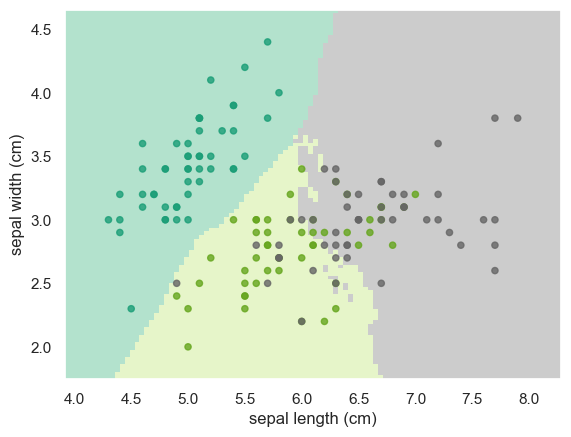

In [100]:
from plot import plot_knn

plot_knn(model, XS, y)

As before, this KNN plot of our model shows that setosa is well separated from both versicolor and virginica. However, there is some overlap between versicolor and virginica and they are not as well separated from each other.

**Modifying the model**

**Feature scaling**

The values for sepal length and sepal width have different ranges but they are not hugely different. A big difference in ranges can impact kNN. To combat this is to scales the values. In this case feature scaling can be adopted to see what difference it makes to the ranges and subsequently the model score. The StandardScaler can be imported from skikit-learn and perform scaling of the data.

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(XS)

StandardScaler()

In [102]:
XS_scaled_raw = scaler.transform(XS)
XS_scaled = pd.DataFrame(XS_scaled_raw, columns=XS.columns)

The scaled results can then be plotted as a scatter plot to see the changes in range to sepal length and sepal width.

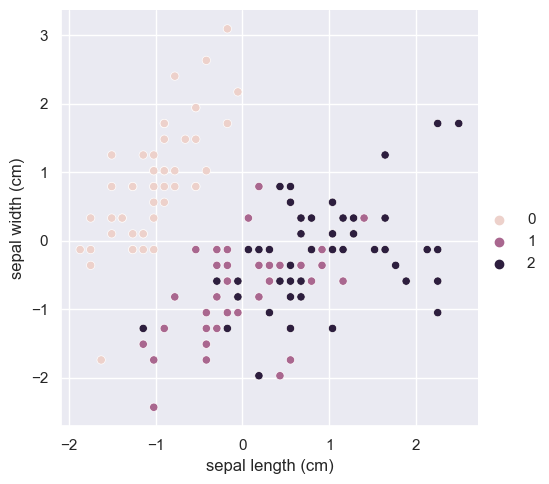

In [103]:
sns.relplot(data=XS_scaled, x="sepal length (cm)", y="sepal width (cm)", hue=y, )

After being scaled the values exist in the same ranges and thus there is an even spread in the data.

Feature scaling can then be added into the model by making a pipeline which uses the scaled data and calls kNN on this. This is then run and a model score generated.

In [104]:
from sklearn.pipeline import make_pipeline

scaled_knn_XS = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=31)
)
scaled_knn_XS

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=31))])

In [105]:
scaled_knn_XS.fit(train_XS, train_yS)
scaled_knn_XS.score(test_XS, test_yS)

0.8421052631578947

The score is in fact slightly worse compared to the non-scaled data with k=31. The boundaries can then be plotted again by calling the plot_knn function from the previously created module.

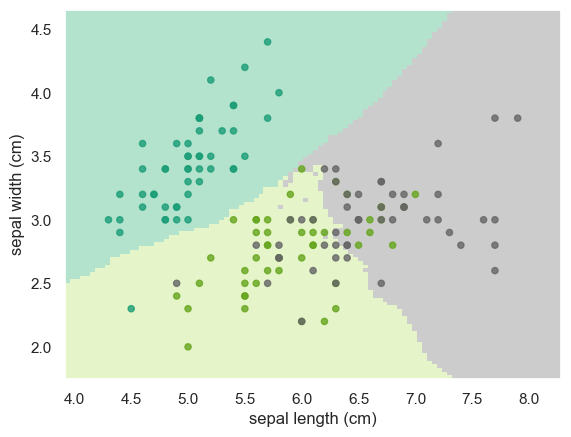

In [106]:
plot_knn(scaled_knn_XS, XS, y)

Comparing this to the plot for the non-scaled data it can be observed that there is only a subtle change with the boundaries.

**Applying the model to all the features**

This pipeline (scaling and kNN) can now be applied to all the features rather than just two (sepal length and sepal width).The data first is re-split, this time using all the features and then the pipeline is applied to it.

In [120]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) 

In [121]:
knn_all_X = make_pipeline(    
    StandardScaler(),
    KNeighborsClassifier()
)
knn_all_X

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [122]:
knn_all_X.fit(train_X, train_y)
knn_all_X.score(test_X, test_y)

1.0

The score for this is too perfect. A PCA can be done to reduce the dimensionality whilst still retaining enough information about the data as a whole. This should help improve the score and make it more realistic and thus, not too perfect. 

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) can be done to indentify the most important features or to group highly correlated features togther in a principal component. This can then reduce the dimensionality and allow more than two features to be included in the model which may improve the score and better represent the data as a whole. 

The PCA function can be imported and then incorporated into the pipeline. It is important to note that the number of components is the same as the number of features in the dataset. 

In [123]:
from sklearn.decomposition import PCA

pca_knn_X = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),  
    KNeighborsClassifier(n_neighbors=31)
)
pca_knn_X

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=31))])

In [124]:
pca_knn_X.fit(train_X, train_y)
pca_knn_X.score(test_X, test_y)

0.9473684210526315

The score has now improved since it is no longer exactly 1.0. Therefore, emplying PCA has seemed to help the model and make it a better predictor. 

The amount of variation explained by each principal component (PC) can then be observed.

In [125]:
pca_knn_X["pca"].explained_variance_ratio_

array([0.71581797, 0.23720827, 0.04188112, 0.00509264])

This output reveals that the frist principal component provides 72%, the second 24%, the thrid 4% and the fourth 0.6%. Thus, the first two PC's explain most of the variation. It can be seen that all four components, together explain 100% of the variation, as shown below.

In [126]:
sum(pca_knn_X["pca"].explained_variance_ratio_)

1.0

GridSearchCV can be employed again to try different numbers of PC's to see how many components give the best score.

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pca_knn_cv = GridSearchCV(
    make_pipeline(
        PCA(),
        KNeighborsClassifier(n_neighbors=31)
    ),
    {
        "pca__n_components" : range(1, 5),
    }
)
pca_knn_cv

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=31))]),
             param_grid={'pca__n_components': range(1, 5)})

In [128]:
pca_knn_cv.fit(train_X, train_y)
pca_knn_cv.score(test_X, test_y)

1.0

In [129]:
pca_knn_cv.best_estimator_["pca"].n_components_

4

This shows that 4 PC's are best to use. As before we can then run the pipeline with scaled data, 4 PC's and 31 nearest neighbours.

In [130]:
from sklearn.decomposition import PCA

pca_knn_2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),  
    KNeighborsClassifier(n_neighbors=31)
)
pca_knn_2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=31))])

In [131]:
pca_knn_2.fit(train_X, train_y)
pca_knn_2.score(test_X, test_y)

0.9473684210526315

In [132]:
sum(pca_knn_2["pca"].explained_variance_ratio_)

1.0

The score is 0.947 (3 d.p.) which is good and is an improved score from the first kNN model with 5 nearest neighbours, a model with just 31 nearest neighbours and a model which did not include PCA. The model incorporates scaled data and principal components that explain all the variation in the data. This is good as it takes all the collected data into account rather than just a selected part of it. Thus, PCA has helped reduce the dimesionality and incorporated more than two features into the model. Overall, the model is a good predictor for the species of iris of the plant and has a distinct separation between setosa and both versicolor and virginica. 